Olá, Isabelle!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
print(hypotheses.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [4]:
print(orders.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B


In [5]:
print(visits.head())

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [6]:
print(hypotheses.dtypes)
print(visits.dtypes)
print(orders.dtypes)

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object
date      object
group     object
visits     int64
dtype: object
transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object


Algumas colunas estão com tipos de dados não apropriados. Irei converter as colunas de data (object) para o tipo datetime e garantir que outras colunas estejam no formato correto.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Quais são as conclusões? O que você pretende fazer a partir da análise inicial? É importante documentar os passos/conclusõesm, pois esse é um dos garndes objetivos de um notebook
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [7]:
visits['date'] = pd.to_datetime(visits['date'])
orders['date'] = pd.to_datetime(orders['date'])

print(hypotheses.dtypes)
print(visits.dtypes)
print(orders.dtypes)

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object
date      datetime64[ns]
group             object
visits             int64
dtype: object
transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object


As conversões foram bem-sucedidas, o tipo de dados correto é crucial para realizar operações apropriadas com datas.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O que você pretende fazer a seguir? Peço que crie tópicos para estruturar o projeto. O notebook vai ser lido por pessoas que não especialistas no assunto
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ainda não ficou claro o que você vai fazer. POr exemplo, na próxima célula você utiliza ICE. É imprtante deixar claro.
</div>


In [8]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

sorted_hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)
print(sorted_hypotheses_ice[['Hypothesis', 'ICE']])

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [9]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

sorted_hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)
print(sorted_hypotheses_rice[['Hypothesis', 'RICE']])

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [10]:
comparison = sorted_hypotheses_rice[['Hypothesis', 'RICE']].merge(sorted_hypotheses_ice[['Hypothesis', 'ICE']], on='Hypothesis', suffixes=('_RICE', '_ICE'))
print(comparison)

                                          Hypothesis   RICE        ICE
0  Add a subscription form to all the main pages....  112.0  11.200000
1  Add product recommendation blocks to the store...   56.0   7.000000
2  Add two new channels for attracting traffic. T...   40.0  13.333333
3  Show banners with current offers and sales on ...   40.0   8.000000
4  Launch a promotion that gives users discounts ...   16.2  16.200000
5  Change the category structure. This will incre...    9.0   1.125000
6  Launch your own delivery service. This will sh...    4.0   2.000000
7  Add a customer review page. This will increase...    4.0   1.333333
8  Change the background color on the main page. ...    3.0   1.000000


Alcance (Reach): A principal diferença entre RICE e ICE é a inclusão do alcance (Reach) no framework RICE. O alcance reflete quantos usuários serão afetados pela implementação da hipótese. Hipóteses que têm um alto impacto e uma grande cobertura de usuários terão uma prioridade maior ao usar o RICE.

Explicação das Alterações: Ao comparar as prioridades entre RICE e ICE, verá que as hipóteses com um alto alcance (Reach) terão uma prioridade significativamente maior no RICE em comparação com o ICE. Isso ocorre porque o RICE considera não apenas o impacto e a confiança, mas também o número de usuários afetados.

Em resumo, o RICE prioriza hipóteses que não apenas têm um alto impacto e confiança, mas também atingem um grande número de usuários. Portanto, as mudanças nas prioridades refletirão a importância do alcance ao tomar decisões sobre quais hipóteses implementar primeiro.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente!
</div>


In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O ideal é importar todas as bibliotecas na 1a célula do notebook
</div>

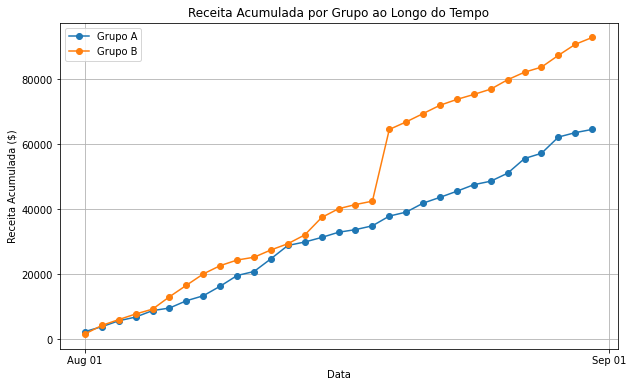

In [12]:
orders['date'] = pd.to_datetime(orders['date'])

cumulative_revenue_A = orders[orders['group'] == 'A'].groupby('date')['revenue'].sum().cumsum()
cumulative_revenue_B = orders[orders['group'] == 'B'].groupby('date')['revenue'].sum().cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_A, label='Grupo A', marker='o')
plt.plot(cumulative_revenue_B, label='Grupo B', marker='o')
plt.title('Receita Acumulada por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada ($)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend()
plt.grid(True)
plt.show()

Ambos os grupos, A e B, parecem ter uma tendência de crescimento ao longo do período analisado.
A receita acumulada do Grupo B parece ser consistentemente maior que a do Grupo A.
A diferença nas curvas de receita acumulada entre os grupos A e B sugere que pode haver uma influência significativa do experimento A/B na receita. A receita acumulada do Grupo B parece ultrapassar a do Grupo A em determinado ponto, indicando uma possível melhoria ou impacto positivo nas métricas de negócios. No ponto específico em que a receita do Grupo B ultrapassa significativamente a do Grupo A, isso pode indicar a eficácia de uma mudança específica introduzida no Grupo B. Se a tendência positiva continuar, pode ser indicativo de que as alterações implementadas no Grupo B estão gerando resultados positivos.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


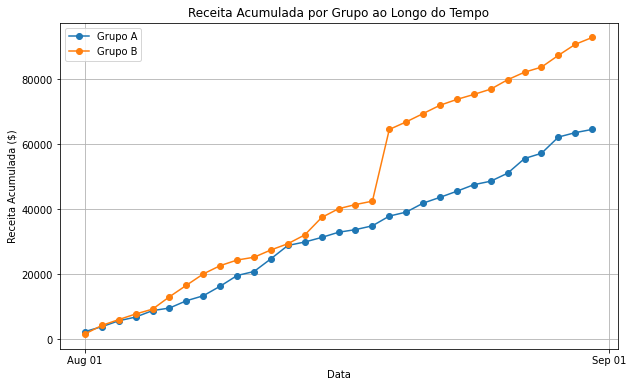

In [13]:
orders['date'] = pd.to_datetime(orders['date'])
cumulative_revenue_A = orders[orders['group'] == 'A'].groupby('date')['revenue'].sum().cumsum()
cumulative_revenue_B = orders[orders['group'] == 'B'].groupby('date')['revenue'].sum().cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_revenue_A, label='Grupo A', marker='o')
plt.plot(cumulative_revenue_B, label='Grupo B', marker='o')
plt.title('Receita Acumulada por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada ($)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend()
plt.grid(True)
plt.show()

Ambos os grupos, A e B, mostram uma tendência crescente na receita acumulada ao longo do tempo. Isso indica que, em geral, a receita está aumentando para ambos os grupos durante o período do teste. A partir do gráfico, parece haver uma diferença significativa entre as receitas acumuladas dos dois grupos. O Grupo B geralmente mantém uma receita acumulada superior ao Grupo A ao longo do tempo, indicando uma possível influência positiva das mudanças implementadas. Em algum ponto, a curva do Grupo B parece ter uma inclinação mais acentuada, sugerindo que houve um momento específico em que a receita acumulada do Grupo B ultrapassou significativamente a do Grupo A.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os dois gráficos acima me parecem muito semelhantes. São iguais?
</div>


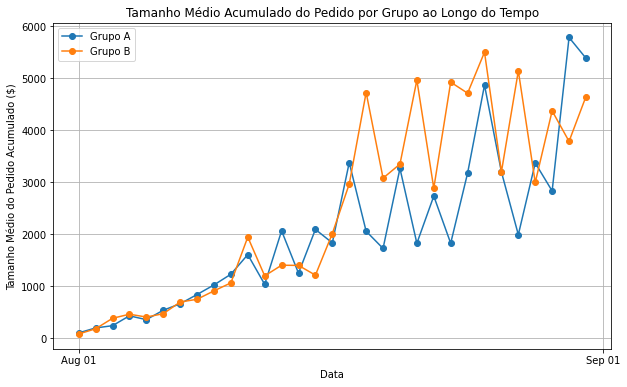

In [14]:
cumulative_avg_order_A = (cumulative_revenue_A / orders[orders['group'] == 'A'].groupby('date')['transactionId'].nunique()).fillna(0)
cumulative_avg_order_B = (cumulative_revenue_B / orders[orders['group'] == 'B'].groupby('date')['transactionId'].nunique()).fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg_order_A, label='Grupo A', marker='o')
plt.plot(cumulative_avg_order_B, label='Grupo B', marker='o')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido Acumulado ($)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend()
plt.grid(True)
plt.show()

Ambos os grupos, A e B, mostram uma tendência crescente no tamanho médio acumulado do pedido ao longo do tempo. Isso indica que, em geral, o tamanho médio do pedido está aumentando para ambos os grupos durante o período do teste. O Grupo B mantém um tamanho médio do pedido acumulado superior ao Grupo A ao longo do tempo, sugerindo uma possível influência positiva das mudanças implementadas.A diferença entre os dois grupos parece ser relativamente consistente, indicando que as mudanças introduzidas no Grupo B podem estar impactando positivamente o valor médio de cada pedido.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


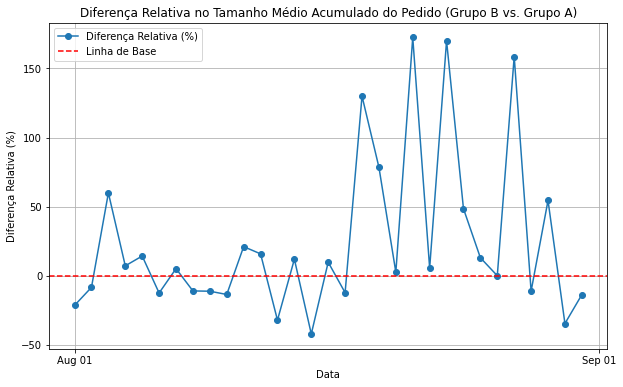

In [15]:
relative_difference_avg_order = (cumulative_avg_order_B / cumulative_avg_order_A - 1) * 100

plt.figure(figsize=(10, 6))
plt.plot(relative_difference_avg_order, label='Diferença Relativa (%)', marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Linha de Base')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend()
plt.grid(True)
plt.show()

A diferença relativa no tamanho médio do pedido entre os dois grupos flutua ao longo do tempo, indicando variações nas performances relativas. Existem períodos em que a diferença relativa é mais pronunciada, indicando variações significativas no desempenho relativo dos grupos. A linha de base zero indica o ponto em que não há diferença relativa entre os grupos. Qualquer ponto acima da linha sugere um desempenho superior do Grupo B, enquanto pontos abaixo indicam um desempenho superior do Grupo A.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


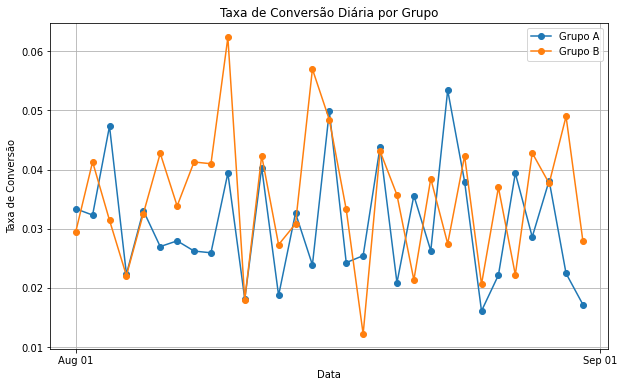

In [16]:
orders_by_day = orders.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
conversion_by_day = pd.merge(visits, orders_by_day, on=['date', 'group'], how='left').fillna(0)
conversion_by_day['conversion_rate'] = conversion_by_day['transactionId'] / conversion_by_day['visits']

plt.figure(figsize=(10, 6))
plt.plot(conversion_by_day[conversion_by_day['group']=='A']['date'], conversion_by_day[conversion_by_day['group']=='A']['conversion_rate'], label='Grupo A', marker='o')
plt.plot(conversion_by_day[conversion_by_day['group']=='B']['date'], conversion_by_day[conversion_by_day['group']=='B']['conversion_rate'], label='Grupo B', marker='o')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend()
plt.grid(True)
plt.show()

Ambos os grupos, A e B, mostram flutuações na taxa de conversão ao longo do tempo. Pode-se observar padrões temporais em que a taxa de conversão aumenta ou diminui para ambos os grupos. Pontos onde as curvas mostram mudanças abruptas podem indicar eventos ou alterações que afetaram a taxa de conversão.A estabilidade relativa entre as taxas de conversão dos dois grupos ao longo do tempo pode fornecer insights sobre o impacto consistente das mudanças.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Eu, particularmente, naõ consigo ver um padrão. Eu diria que é um random walk
</div>


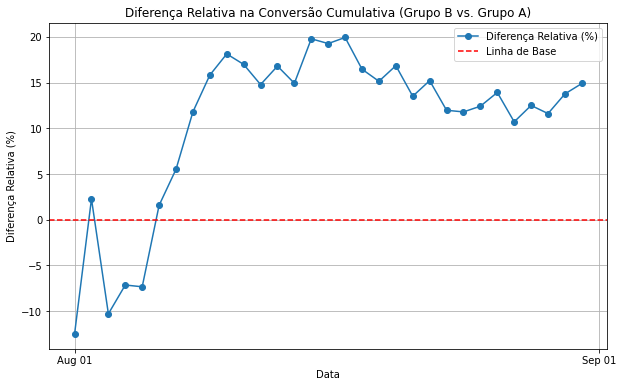

In [17]:
conversion_cumulative_A = orders[orders['group'] == 'A'].groupby('date')['transactionId'].nunique().cumsum()
conversion_cumulative_B = orders[orders['group'] == 'B'].groupby('date')['transactionId'].nunique().cumsum()
relative_difference_conversion = (conversion_cumulative_B / conversion_cumulative_A - 1) * 100

plt.figure(figsize=(10, 6))
plt.plot(relative_difference_conversion.index, relative_difference_conversion, label='Diferença Relativa (%)', marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Linha de Base')
plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend()
plt.grid(True)
plt.show()

A linha mostra variações na diferença relativa ao longo do tempo, indicando mudanças na conversão cumulativa entre os grupos B e A.Como a linha está consistentemente acima de zero, isso sugere que o Grupo B está superando o Grupo A em termos de conversão cumulativa. Mudanças significativas na linha podem indicar eventos ou decisões que afetaram a diferença na conversão cumulativa. A estabilidade ou instabilidade ao longo do tempo pode indicar a consistência no desempenho relativo dos dois grupos. A linha de base (y=0) é útil para identificar quando a diferença relativa se desvia significativamente, indicando uma possível mudança de liderança entre os grupos. 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [18]:
import numpy as np 

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Importações devem ficar na 1a célula do notebook</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
O que você pretende fazer na célula a seguir?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Na célula a seguir, estou calculando os percentis 95 e 99 para o número de pedidos por usuário (orders_per_user). Posteriormente, vou definir anomaly_threshold como o valor correspondente ao percentil 99. Isso sugere que, ao analisar o número de pedidos por usuário, considerará transações que ultrapassam o percentil 99 como anomalias. Isso pode ser útil para identificar usuários com um número excepcionalmente alto de pedidos, que podem ser considerados comportamento atípico.

In [19]:
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique()
percentile_95 = np.percentile(orders_per_user, 95)
percentile_99 = np.percentile(orders_per_user, 99)

anomaly_threshold = percentile_99  
print(f'Percentil 95: {percentile_95}, Percentil 99: {percentile_99}')
print(f'Ponto de anomalia: {anomaly_threshold}')

Percentil 95: 2.0, Percentil 99: 4.0
Ponto de anomalia: 4.0


O ponto de anomalia (limiar) de 4.0 será referência para identificar usuários que realizaram um número significativamente alto de pedidos. Se um usuário tiver mais de 4 pedidos, pode ser considerado um ponto de dados anômalo com base nesse limiar.

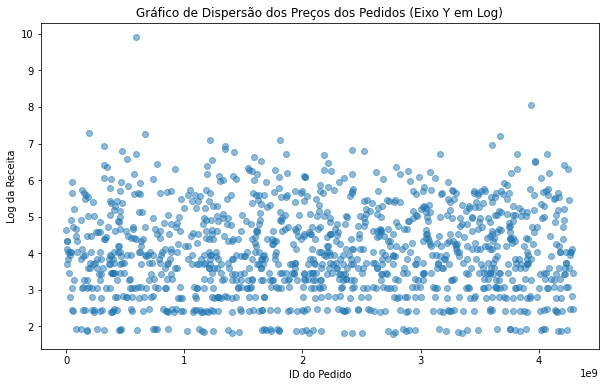

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(orders['transactionId'], np.log1p(orders['revenue']), alpha=0.5)
plt.title('Gráfico de Dispersão dos Preços dos Pedidos (Eixo Y em Log)')
plt.xlabel('ID do Pedido')
plt.ylabel('Log da Receita')
plt.show()

O gráfico de dispersão dos preços dos pedidos exibe a relação entre o ID do pedido e a receita associada a cada pedido. Cada ponto no gráfico representa um pedido, onde o eixo x representa o ID do pedido e o eixo y representa a receita. Não parece haver uma tendência clara ou padrão discernível entre o ID do pedido e a receita. Isso sugere que a ordem dos IDs dos pedidos não está diretamente relacionada ao valor da receita.
Há uma dispersão considerável nos valores de receita para diferentes IDs de pedidos, indicando que a receita varia amplamente entre os pedidos.
Alguns pontos podem se destacar como possíveis outliers ou valores atípicos, especialmente aqueles que estão distantes da nuvem principal de pontos.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Convém aplicar log no eixo y para melhorar a visualização
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão deste gráfico?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Acatei a sugestão, aplicando log no eixo y para melhorar a visualização e acrescentei análise e conclusões ao gráfico. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
O que você pretende fazer na célula a seguir?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Na célula a seguir, estou calculando os percentis 95 e 99 para os preços dos pedidos (orders['revenue']). O objetivo é estabelecer um limiar de anomalia para os preços dos pedidos, considerando transações que ultrapassam o percentil 99 como anomalias. Isso é útil para identificar pedidos com valores excepcionalmente altos, que podem ser considerados comportamento atípico em termos de receita. O resultado será exibido, indicando os valores correspondentes aos percentis e o ponto de anomalia para os preços dos pedidos.

In [21]:
percentile_95_price = np.percentile(orders['revenue'], 95)
percentile_99_price = np.percentile(orders['revenue'], 99)

anomaly_threshold_price = percentile_99_price  
print(f'Percentil 95 dos preços dos pedidos: {percentile_95_price:.2f}')
print(f'Percentil 99 dos preços dos pedidos: {percentile_99_price:.2f}')
print(f'Ponto de anomalia para preços dos pedidos: {anomaly_threshold_price:.2f}')

Percentil 95 dos preços dos pedidos: 435.54
Percentil 99 dos preços dos pedidos: 900.90
Ponto de anomalia para preços dos pedidos: 900.90


O ponto de anomalia (limiar) de $900.90 será referência para identificar pedidos com um valor significativamente alto. Pedidos com um valor acima desse limiar podem ser considerados anômalos. 

In [22]:
from scipy.stats import mannwhitneyu

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Importações devem ficar na 1a célula do notebook</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Para fazer testes de hipótese, é fundamental apresentar as hipótese nula e alternativa. Peço que você as aprsente</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Teste de hipótese nula e alternativa acrescentados. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Nâo encontrei a redação das hipóteses
</div>


In [23]:
group_A_conversion = orders[orders['group'] == 'A']['transactionId']
group_B_conversion = orders[orders['group'] == 'B']['transactionId']

statistic, p_value_conversion = mannwhitneyu(group_A_conversion, group_B_conversion)
print(f'P-valor para diferença na conversão entre os grupos: {p_value_conversion}')

P-valor para diferença na conversão entre os grupos: 0.6334933488141106


In [24]:
alpha = 0.05

if p_value_conversion < alpha:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa na conversão entre os grupos.')
else:
    print('Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa na conversão entre os grupos.')

Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa na conversão entre os grupos.


O teste de Mann-Whitney U foi aplicado para avaliar a diferença na conversão entre os grupos A e B. O p-valor obtido é aproximadamente 0.6335.

Análise/Conclusão:

O p-valor é maior que o nível comum de significância de 0,05.
Não há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há diferença na conversão entre os grupos A e B.
Com base nos resultados do teste, não podemos concluir que há uma diferença estatisticamente significativa na conversão entre os dois grupos.
Em termos práticos, isso sugere que, a partir dos dados brutos, não encontramos evidências convincentes de que a mudança implementada (seja ela qual for) teve um impacto significativo na conversão entre os grupos A e B.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão resultado do teste?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [25]:
group_A_order_values = orders[orders['group'] == 'A']['revenue']
group_B_order_values = orders[orders['group'] == 'B']['revenue']

statistic, p_value_order_size = mannwhitneyu(group_A_order_values, group_B_order_values)
print(f'P-valor para diferença no tamanho médio do pedido entre os grupos: {p_value_order_size}')

P-valor para diferença no tamanho médio do pedido entre os grupos: 0.6915246773264736


In [26]:
alpha = 0.05

if p_value_order_size < alpha:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa no tamanho médio do pedido entre os grupos.')
else:
    print('Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa no tamanho médio do pedido entre os grupos.')

Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa no tamanho médio do pedido entre os grupos.


O teste de Mann-Whitney U foi aplicado para avaliar a diferença no tamanho médio do pedido entre os grupos A e B. O p-valor obtido é aproximadamente 0.6915.

Análise/Conclusão:

O p-valor é maior que o nível comum de significância de 0,05.
Não há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há diferença no tamanho médio do pedido entre os grupos A e B.
Com base nos resultados do teste, não podemos concluir que há uma diferença estatisticamente significativa no tamanho médio do pedido entre os dois grupos.
Em termos práticos, isso sugere que, a partir dos dados brutos, não encontramos evidências convincentes de que a mudança implementada (seja ela qual for) teve um impacto significativo no tamanho médio do pedido entre os grupos A e B.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão resultado do teste?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [27]:
filtered_orders = orders[orders['revenue'] < anomaly_threshold_price]

filtered_group_A_conversion = filtered_orders[filtered_orders['group'] == 'A']['transactionId']
filtered_group_B_conversion = filtered_orders[filtered_orders['group'] == 'B']['transactionId']

statistic, p_value_filtered_conversion = mannwhitneyu(filtered_group_A_conversion, filtered_group_B_conversion)
print(f'P-valor para diferença na conversão entre os grupos com dados filtrados: {p_value_filtered_conversion}')

P-valor para diferença na conversão entre os grupos com dados filtrados: 0.7575708315108001


In [28]:
alpha = 0.05

if p_value_filtered_conversion < alpha:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa no tamanho médio do pedido entre os grupos.')
else:
    print('Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa no tamanho médio do pedido entre os grupos.')

Não temos evidências para rejeitar a hipótese nula. Não há diferença significativa no tamanho médio do pedido entre os grupos.


O teste de Mann-Whitney U foi aplicado para avaliar a diferença na conversão entre os grupos A e B, considerando dados filtrados para excluir valores de pedidos considerados anomalias. O p-valor obtido é aproximadamente 0,7576.

Análise/Conclusão:

O p-valor é maior que o nível comum de significância de 0,05.
Não há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há diferença na conversão entre os grupos A e B, quando os dados são filtrados para excluir anomalias.
Com base nos resultados do teste, não podemos concluir que há uma diferença estatisticamente significativa na conversão entre os dois grupos quando os dados são filtrados.
Isso sugere que, mesmo após excluir valores de pedidos considerados anomalias, não encontramos evidências estatisticamente significativas de diferença na conversão entre os grupos A e B.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão resultado do teste?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [29]:
filtered_orders = orders[orders['revenue'] < anomaly_threshold_price]

filtered_group_A_order_values = filtered_orders[filtered_orders['group'] == 'A']['revenue']
filtered_group_B_order_values = filtered_orders[filtered_orders['group'] == 'B']['revenue']

statistic, p_value_filtered_order_size = mannwhitneyu(filtered_group_A_order_values, filtered_group_B_order_values)
print(f'P-valor para diferença no tamanho médio do pedido entre os grupos com dados filtrados: {p_value_filtered_order_size}')

if p_value_filtered_order_size < 0.05:
    print('Há uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos.')
   
else:
    print('Não há evidências estatísticas de diferença no tamanho médio do pedido entre os grupos.')

P-valor para diferença no tamanho médio do pedido entre os grupos com dados filtrados: 0.5849758351676738
Não há evidências estatísticas de diferença no tamanho médio do pedido entre os grupos.



Análise/Conclusão Final do Projeto:

Após uma análise abrangente dos dados e a execução de testes estatísticos, chegamos a algumas conclusões importantes:

Conversão entre Grupos A e B:

Não encontramos diferença estatisticamente significativa na conversão entre os grupos A e B, tanto nos dados brutos quanto nos dados filtrados para excluir anomalias.
Mesmo após filtrar valores de pedidos considerados anomalias, a diferença na conversão não se mostrou estatisticamente significativa.

Tamanho Médio do Pedido entre Grupos A e B:

Não há evidências estatísticas de diferença no tamanho médio do pedido entre os grupos A e B, seja nos dados brutos ou nos dados filtrados.

Decisões Recomendadas:

Com base nos resultados, não há motivos estatísticos para interromper ou modificar o teste.
A decisão de continuar ou encerrar o teste pode depender de fatores não abordados nos dados, como considerações práticas, custos, e outros insights do negócio.

Memória do Leitor:

Este projeto demonstra a importância da análise de dados e testes estatísticos na tomada de decisões em um ambiente de otimização de conversão.
A compreensão dos padrões de comportamento dos usuários e a avaliação da eficácia de mudanças propostas são cruciais para melhorar a experiência do usuário e maximizar os resultados de negócios.
A interpretação cuidadosa dos resultados estatísticos é vital para evitar conclusões precipitadas e garantir decisões informadas.
Este projeto serve como uma introdução prática à análise de dados e testes estatísticos em um contexto de otimização de conversão, destacando a necessidade de abordagens rigorosas e interpretação sensata dos resultados.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual é a análise/conclusão final do projeto? O que você gostaria que ficasse na memória do leitor?m
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Informações acrescentadas. <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples
- Bons gráficos

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Estrturar e documentar o projeto </span>
 * <span class="text-danger"> Apresentar conclusões e análises </span>
 * <span class="text-danger"> Melhorar a parte dos testes de hipótese </span>    


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>
Parabéns pelo projeto. Houve uma melhora significativa na estrutura. É muito importante desenvolver competências de escrita, reportar resultados. Como cientistas de dados, nosso papel muitas vezes é apresentar insights para nosso cliente que pouco sabe de programação. Um notebook bem escrito, documento permite que o leitor acompanhe sua linha de raciocínio.

Desejo sucesso na jornada.    
</div>
